In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
import sklearn
from random import random
from sklearn.model_selection import cross_validate
import matplotlib
from waveform_methods import binning
import pandas as pd

from scipy.stats import norm
import pickle
from statistics import mode
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import scale

In [2]:
file = uproot.open('/home/andy/12360.root')
file2 = uproot.open('/home/andy/12362.root')

In [3]:
print(file['All_radius'].keys())

[b'Count_All_radius', b'Run', b'Event', b'SubEvent', b'SubEventStream', b'SubEventStream_String', b'exists', b'string', b'om', b'pmt', b'vector_index', b'item']


In [4]:
Eloss_keys = file['Stoch_Reco'].keys()[6:18]
for i in range(len(Eloss_keys)):
    if i == 0:
        Eloss1 = file['Stoch_Reco'][Eloss_keys[i]].array()
    else:
        Eloss1 += file['Stoch_Reco'][Eloss_keys[i]].array()
Eloss1 = Eloss1/len(Eloss_keys)

Eloss_keys = file2['Stoch_Reco'].keys()[6:18]
for i in range(len(Eloss_keys)):
    if i == 0:
        Eloss2 = file2['Stoch_Reco'][Eloss_keys[i]].array()
    else:
        Eloss2 += file2['Stoch_Reco'][Eloss_keys[i]].array()
Eloss2 = Eloss2/len(Eloss_keys)

Eloss = np.append(Eloss1,Eloss2)

In [5]:
cut = []
for i in file['IT73AnalysisInIceQualityCuts'].keys()[6:11]:
    cut.append(file['IT73AnalysisInIceQualityCuts'][i].array())
cut2 = list(zip(cut))
for i in range(len(cut2)):
    if i == 0:
        final_cut = cut2[i][0]
    else:
        final_cut = [j and k for j,k in zip(final_cut,cut2[i][0])]
        
cut = []
for i in file2['IT73AnalysisInIceQualityCuts'].keys()[6:11]:
    cut.append(file2['IT73AnalysisInIceQualityCuts'][i].array())
cut2 = list(zip(cut))
for i in range(len(cut2)):
    if i == 0:
        final_cut2 = cut2[i][0]
    else:
        final_cut2 = [j and k for j,k in zip(final_cut,cut2[i][0])]
        
in_ice_cuts = np.append(final_cut,final_cut2)

In [6]:
Xmax1 = file['MCPrimaryInfo']['ghMaxDepth'].array()
valueDepth = file['MCPrimaryInfo']['longNumCharged'].array()
Depth1 = file['MCPrimaryInfo']['longDepth'].array()
chi2_1 = file['CurvatureOnlyParams']['chi2_time'].array()
red1 = file['MCPrimaryInfo']['ghRedChiSqr'].array()
mass1 = [1 for i in range(len(red1))]
        
Xmax2 = file2['MCPrimaryInfo']['ghMaxDepth'].array()
valueDepth = file2['MCPrimaryInfo']['longNumCharged'].array()
Depth2 = file2['MCPrimaryInfo']['longDepth'].array()
chi2_2 = file2['CurvatureOnlyParams']['chi2_time'].array()
red2 = file2['MCPrimaryInfo']['ghRedChiSqr'].array()
mass2 = [4 for i in range(len(red2))]


In [7]:
S125_1 = file['LaputopParams']['s125'].array()
S125_2 = file2['LaputopParams']['s125'].array()
A1 = file['CurvatureOnlyParams']['A'].array()
A2 = file2['CurvatureOnlyParams']['A'].array()
D1 = file['CurvatureOnlyParams']['D'].array()
D2 = file2['CurvatureOnlyParams']['D'].array()
N1 = file['CurvatureOnlyParams']['N'].array()
N2 = file2['CurvatureOnlyParams']['N'].array()
beta1 = file['LaputopParams']['beta'].array()
beta2 = file2['LaputopParams']['beta'].array()
zenith1 = file['Laputop']['zenith'].array()
zenith2 = file2['Laputop']['zenith'].array()
energy1 = file['MCPrimary']['energy'].array()
energy2 = file2['MCPrimary']['energy'].array()
stoch1_1 = file['Stoch_Reco']['n_he_stoch'].array()
stoch1_2 = file2['Stoch_Reco']['n_he_stoch'].array()
stoch2_1 = file['Stoch_Reco2']['n_he_stoch'].array()
stoch2_2 = file2['Stoch_Reco2']['n_he_stoch'].array()

m1 = file['m']['item'].array()
m2 = file2['m']['item'].array()
s1 = file['s']['item'].array()
s2 = file2['s']['item'].array()

slc_charge1 = file['LaputopSLCPE']['charge'].array()
slc_charge2 = file2['LaputopSLCPE']['charge'].array()

slc_charge1 = [np.sum(i[np.isnan(i)==False]) for i in slc_charge1]
slc_charge2 = [np.sum(i[np.isnan(i)==False]) for i in slc_charge2]

hlc_charge1 = file['LaputopHLCPE']['charge'].array()
hlc_charge2 = file2['LaputopHLCPE']['charge'].array()

hlc_charge1 = [np.sum(i[np.isnan(i) ==False]) for i in hlc_charge1]
hlc_charge2 = [np.sum(i[np.isnan(i)==False]) for i in hlc_charge2]

Qtot1 = [i+j for i,j in zip(slc_charge1,hlc_charge1)]
Qtot2 = [i+j for i,j in zip(slc_charge2,hlc_charge2)]

radius1 = file['All_radius']['item'].array()
radius2 = file2['All_radius']['item'].array()


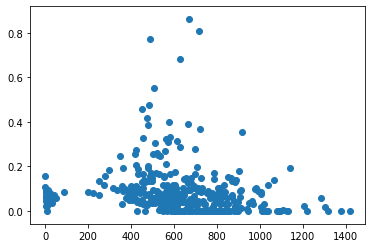

In [54]:
mean1 = []
bins1 = []
std1 = []
for i in range(len(radius1[0:1000])):
    mean,std,bins = binning(radius1[i],np.log10(s1[i]),bins=10)
    mean1.append(mean)
    bins1.append(bins)
    std1.append(std)
mean,std,bins = binning(np.hstack(bins1),np.hstack(std1),bins=2000)
plt.scatter(bins,mean)
plt.show()

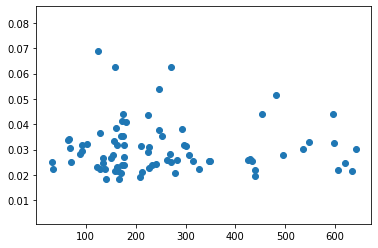

In [62]:
plt.scatter(radius1[11],s1[11])
plt.show()

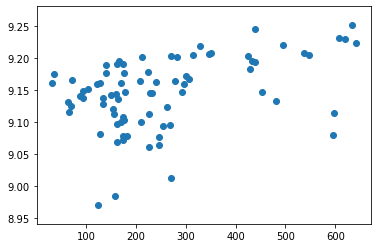

In [63]:
plt.scatter(radius1[11],m1[11])
plt.show()

In [10]:
s1_mean = np.array([np.mean(i[j<300]) for i,j in zip(s1,radius1)])
s2_mean = np.array([np.mean(i[j<300]) for i,j in zip(s2,radius2)])
s1_std = np.array([np.std(i[j<300]) for i,j in zip(s1,radius1)])
s2_std = np.array([np.std(i[j<300]) for i,j in zip(s2,radius2)])

In [11]:
m1_mean = np.array([np.mean(i[j<300]) for i,j in zip(m1,radius1)])
m2_mean = np.array([np.mean(i[j<300]) for i,j in zip(m2,radius2)])
m1_std = np.array([np.std(i[j<300]) for i,j in zip(m1,radius1)])
m2_std = np.array([np.std(i[j<300]) for i,j in zip(m2,radius2)])

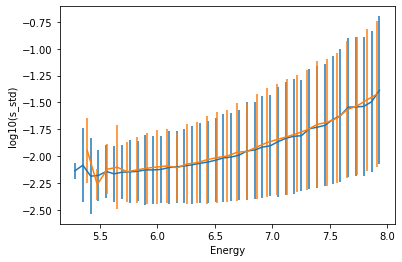

In [56]:
mean,std,bins = binning(np.log10(energy1),np.log10(s1_std),bins=40)
mean2,std2,bins2 = binning(np.log10(energy2),np.log10(s2_std),bins=30)
plt.errorbar(bins,mean,std)
plt.errorbar(bins2,mean2,yerr=std2)
plt.xlabel('Energy')
plt.ylabel('log10(s_std)')
plt.savefig('energy_s_std')

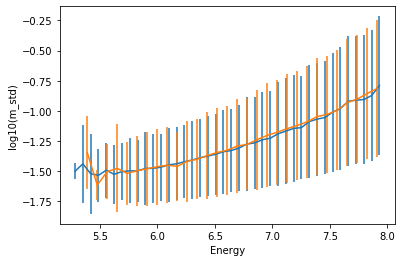

In [55]:
mean,std,bins = binning(np.log10(energy1),np.log10(m1_std),bins=40)
mean2,std2,bins2 = binning(np.log10(energy2),np.log10(m2_std),bins=30)
plt.errorbar(bins,mean,yerr=std)
plt.errorbar(bins2,mean2,yerr=std2)
plt.xlabel('Energy')
plt.ylabel('log10(m_std)')
plt.savefig('energy_m_std')

In [14]:
A = np.append(A1,A2)
D = np.append(D1,D2)
N = np.append(N1,N2)
S125 = np.log10(np.append(S125_1,S125_2))
beta = np.log10(np.append(beta1,beta2))
chi2 = np.append(chi2_1,chi2_2)
red = np.append(red1,red2)
zenith = np.cos(np.append(zenith1,zenith2))
Xmax = np.append(Xmax1,Xmax2)
red = np.append(red1,red2)
mass = np.append(mass1,mass2)
slc_charge = np.append(slc_charge1,slc_charge2)
hlc_charge = np.append(hlc_charge1,hlc_charge2)
qtot = np.append(Qtot1,Qtot2)
stoch1 = np.append(stoch1_1,stoch1_2)
stoch2 = np.append(stoch2_1,stoch2_2)
for i in range(len(stoch1)):
    if not in_ice_cuts[i]:
        stoch1[i] = 0
        stoch2[i] = 0

energy_loss = Eloss
for i in range(len(energy_loss)):
    if ((energy_loss[i] != 0 and in_ice_cuts[i]) and np.isfinite(energy_loss[i])) and not np.isnan(energy_loss[i]):
        energy_loss[i] = np.log10(abs(energy_loss[i]))
    else:
        energy_loss[i] = 0
        
energy = np.log10(np.append(energy1,energy2))
s = log_normal['s']
m = log_normal['m']
fit_status = log_normal['fit_status']

in_ice_cuts = [i and j for i,j in zip(in_ice_cuts,fit_status)]

NameError: name 'log_normal' is not defined

In [ ]:
values = [mass,
            energy_loss,
            stoch1,
            stoch2,
            A,
            D,
            N,
            S125,
            beta,
            zenith,
            chi2,
            slc_charge,
            hlc_charge,
            qtot
            ]

print(np.corrcoef(values))

In [ ]:
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

input_variable2_old = scale(np.array(list(zip(A,beta,energy_loss,S125,zenith,m,s)))[in_ice_cuts])
output_new_old = mass[in_ice_cuts]
energy_value = energy[in_ice_cuts]

index = range(len(output_new_old))

output,validation,output_mass,validation_mass = train_test_split(index,output_new_old,test_size=0.1,random_state=42,shuffle=True)
        
validation_x = input_variable2_old[validation]
validation_y = output_new_old[validation]
validation_energy = energy_value[validation]
input_variable = np.array(input_variable2_old)[output]
output_new = np.array(output_new_old)[output]
energy_value = energy_value[output]
weights = np.array((qtot**0.5)[in_ice_cuts][output])
index = np.array(range(len(weights)))

In [ ]:
import keras
from keras import initializers,regularizers
from keras.layers import Dense, Dropout, Flatten, Input, Concatenate, LeakyReLU, BatchNormalization
from keras.models import Model, load_model
import keras.backend as K
from tensorflow.python.framework import ops
from tensorflow.python.ops import gen_math_ops as math_ops

In [ ]:
train_index,test_index,train_labels,test_labels = train_test_split(index,output_new,test_size=0.2,random_state=42,shuffle=True)

In [ ]:
best_model = keras.callbacks.ModelCheckpoint('Mass_model_best_coinc2.h5',
                                             monitor='val_loss',
                                             save_best_only=True,
                                             save_weights_only=False,
                                             mode='auto')
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
input_layer = Input(shape=(8,))

model1 = Dense(16,activation='sigmoid')(input_layer)

#model1 = LeakyReLU()(model1)

model1 = Dropout(rate=0.5)(model1)

model2 = Dense(16,activation='sigmoid')(model1)

#model2 = LeakyReLU()(model2)

predictions = Dense(1,activation='linear')(model2)

model = Model(inputs=input_layer,outputs=predictions)

opt = keras.optimizers.RMSprop(decay=1e-5)
#opt= keras.optimizers.Adam(decay=1e-5,lr=1e-4)                                                               

model.compile(optimizer=opt , loss = 'mae')

print(model.summary())

In [ ]:
history = model.fit(input_variable[train_index],train_labels,
                    batch_size=30,
                    epochs=100,
                    validation_data = (input_variable[test_index],test_labels),
                    callbacks=[best_model,callback],
                   class_weight = {1:0.125,4:0.875}
                   )

model.save('Mass_model_coinc2.h5')

In [ ]:
new_model = load_model('Mass_model_best_coinc2.h5')
predict = new_model.predict(validation_x)

In [ ]:
plt.hist(predict[validation_y==1],bins=100)
plt.show()
plt.hist(predict[validation_y==4],bins=100)
plt.show()
count = 0
for i in predict[validation_y==4]>2.5:
    if i:
        count+=1
print(count)

count = 0
for i in predict[validation_y==1]<2.5:
    if i:
        count+=1
print(count)

In [ ]:
count = 0
for i in validation_y==1:
    if i:
        count+=1
print(count)

count = 0
for i in validation_y==4:
    if i:
        count+=1
print(count)

In [ ]:
index = range(len(validation_energy))
array_split = np.array_split(sorted(list(zip(index,validation_energy)),key=lambda x:x[1]),20)

In [ ]:
#model = load_model('Mass_model_best_coinc2.h5')
x = []
y_proton = []
y_iron = []
for i in array_split:
    index1 = []
    for k in list(zip(*i))[0]:
        index1.append(int(k))
    energy = validation_energy[index1]
    mass1 = validation_y[index1]
    data = validation_x[index1]
    #prediction1 = prediction_model(data)
    prediction1 = dnns_classifier.predict(data)
    prediction = np.hstack(prediction1)
    
    for j in range(len(prediction1)):
        if prediction1[j] < 2.5:
            prediction1[j] = 1
        else:
            prediction1[j] = 4
    cm = confusion_matrix(mass1,prediction1)
    x.append((max(energy)+min(energy))/2)
    y_proton.append(cm[0][0]/np.sum(cm[0]))
    y_iron.append(cm[1][1]/np.sum(cm[1]))

In [ ]:
plt.scatter(x,y_proton,label='proton')
plt.scatter(x,y_iron,label='iron')
plt.xlabel('Energy')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Energy_accuracy_coinc2')

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
resample_training_inputs,resample_training_output_labels = sm.fit_resample(input_variable[train_index],train_labels)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(resample_training_inputs,resample_training_output_labels)
knn_predictions=knn_classifier.predict(input_variable[test_index])

In [ ]:
cm = confusion_matrix(test_labels,knn_predictions)
print(cm[0][0]/np.sum(cm[0]),cm[1][1]/np.sum(cm[1]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(resample_training_inputs,resample_training_output_labels)
rf_predictions = rf_classifier.predict(input_variable[test_index])

In [ ]:
cm = confusion_matrix(test_labels,rf_predictions)
print(cm[0][0]/np.sum(cm[0]),cm[1][1]/np.sum(cm[1]))

In [ ]:
from sklearn.neural_network import MLPClassifier
snn_classifier = MLPClassifier(hidden_layer_sizes = [16]*5,solver='adam')
snn_classifier.fit(resample_training_inputs,resample_training_output_labels)
snn_predictions= snn_classifier.predict(input_variable[test_index])

In [ ]:
cm = confusion_matrix(test_labels,snn_predictions)
print(cm[0][0]/np.sum(cm[0]),cm[1][1]/np.sum(cm[1]))

In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC(decision_function_shape='ovr')
svm_classifier.fit(resample_training_inputs,resample_training_output_labels)
svm_predicitons_labels = svm_classifier.predict(input_variable[test_index])

In [ ]:
cm = confusion_matrix(test_labels,svm_predicitons_labels)
print(cm[0][0]/np.sum(cm[0]),cm[1][1]/np.sum(cm[1]))

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
dnns_classifier = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [16]*5,solver='adam',learning_rate='adaptive',max_iter=300,early_stopping=True))
dnns_classifier.fit(resample_training_inputs,resample_training_output_labels)
dnns_predictions_labels = dnns_classifier.predict(input_variable[test_index])

In [ ]:
cm = confusion_matrix(test_labels,dnns_predictions_labels)
print(cm[0][0]/np.sum(cm[0]),cm[1][1]/np.sum(cm[1]))

In [ ]:
from xgboost import XGBClassifier
xgb_classifier = OneVsRestClassifier(XGBClassifier())
xgb_classifier.fit(resample_training_inputs,resample_training_output_labels)
xgb_classifier_labels = xgb_classifier.predict(input_variable[test_index])

In [ ]:
cm = confusion_matrix(test_labels,xgb_classifier_labels)
print(cm[0][0]/np.sum(cm[0]),cm[1][1]/np.sum(cm[1]))